In [27]:
%matplotlib inline  
from __future__ import division
import sys, json, math
sys.path.insert(0, '../../')
from phenomena.particle import Particle, ParticleDT
import pypdt
import numpy as np
import matplotlib.pyplot as plt


In [34]:
tbl = pypdt.ParticleDataTable()

part_dict = {}
for p in tbl:
    part_dict[p.name]= p.id

mass_array = []
mass_dict = {}
for p in tbl: 
    mass_array.append(p.mass)
    mass_dict[p.name]=p.mass
mass_array=np.asarray(mass_array)

def search_mass(mass):
    for name, m in mass_dict.iteritems():
        if m == mass:
            print name

def renormalize_lin(n, range1, range2):
    delta1 = range1[1] - range1[0]
    delta2 = range2[1] - range2[0]
    return (delta2 * (n - range1[0]) / delta1) + range2[0]

In [11]:
search_mass(max(mass_array))

tbar


In [12]:
search_mass(min(mass_array))

nu_tau
g0
gamma0
nu_e
nubar_e
nubar_mu
nu_mu
nubar_tau


In [13]:
len(mass_array)

403

403

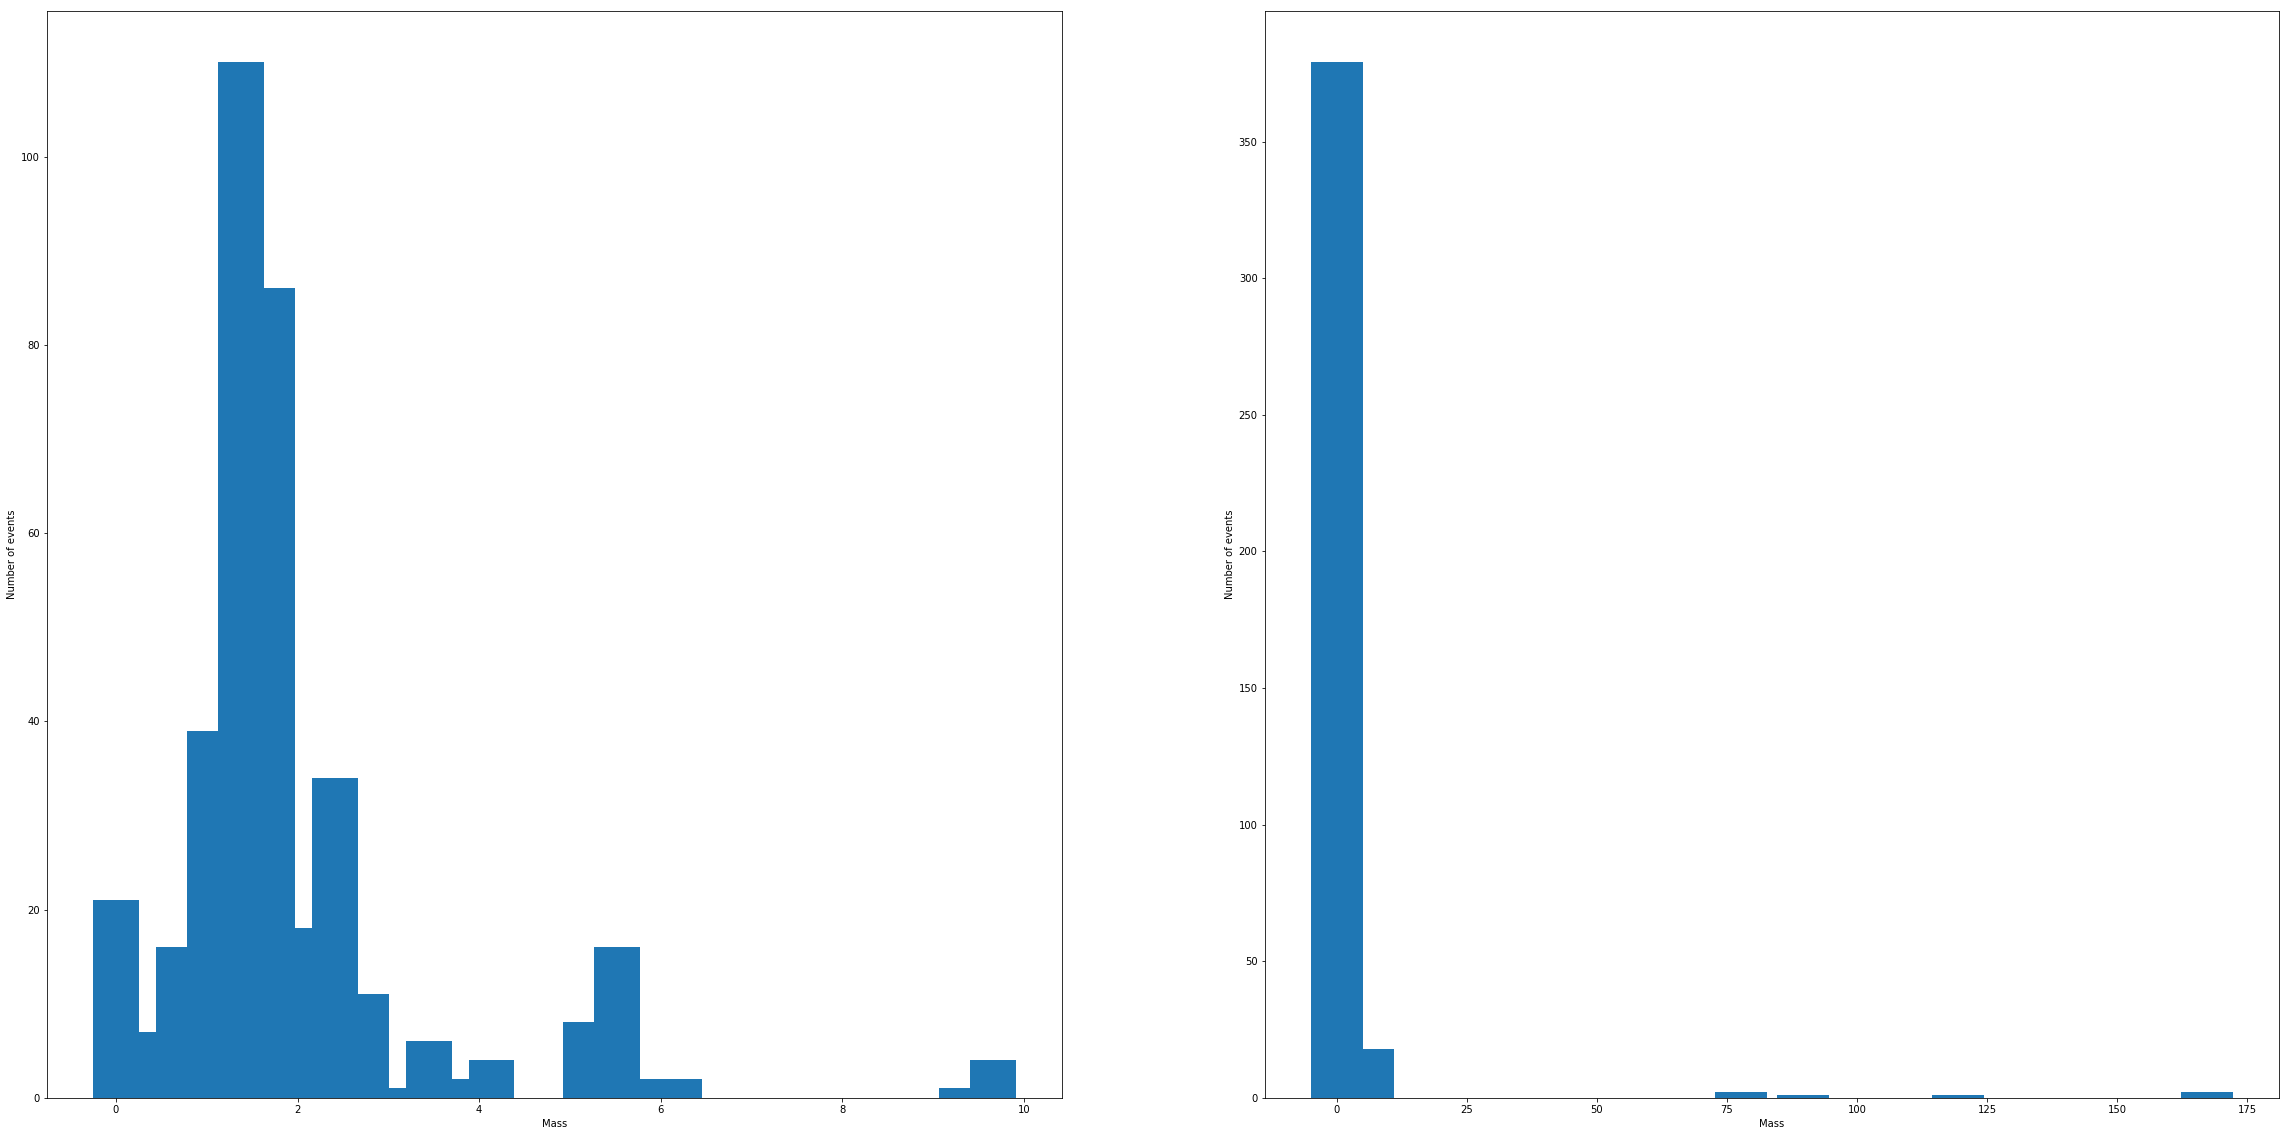

In [24]:
plt.figure(figsize=(40,20))
plt.subplot(1, 2, 1)
hist, bin_edges =np.histogram(mass_array, bins=np.linspace(0,10,30))
plt.bar(bin_edges[:-1], hist, width=0.5)
plt.xlabel('Mass')
plt.ylabel('Number of events')
plt.subplot(1, 2, 2)
hist, bin_edges =np.histogram(mass_array, bins=np.linspace(min(mass_array),max(mass_array),30))
plt.bar(bin_edges[:-1], hist, width=10)
plt.xlabel('Mass')
plt.ylabel('Number of events')
hist.sum()

In [171]:
def log(a):
    return np.log10(1+a, out=np.zeros_like(a), where=a!=0)

def p3map(n):
    range1 =[0,max(log(mass_array))]
    range2 =[0,1]
    delta1 = range1[1] - range1[0]
    delta2 = range2[1] - range2[0]
    return (delta2 * (n - range1[0]) / delta1) + range2[0]

def convert(x):
    return p3map(log(x))

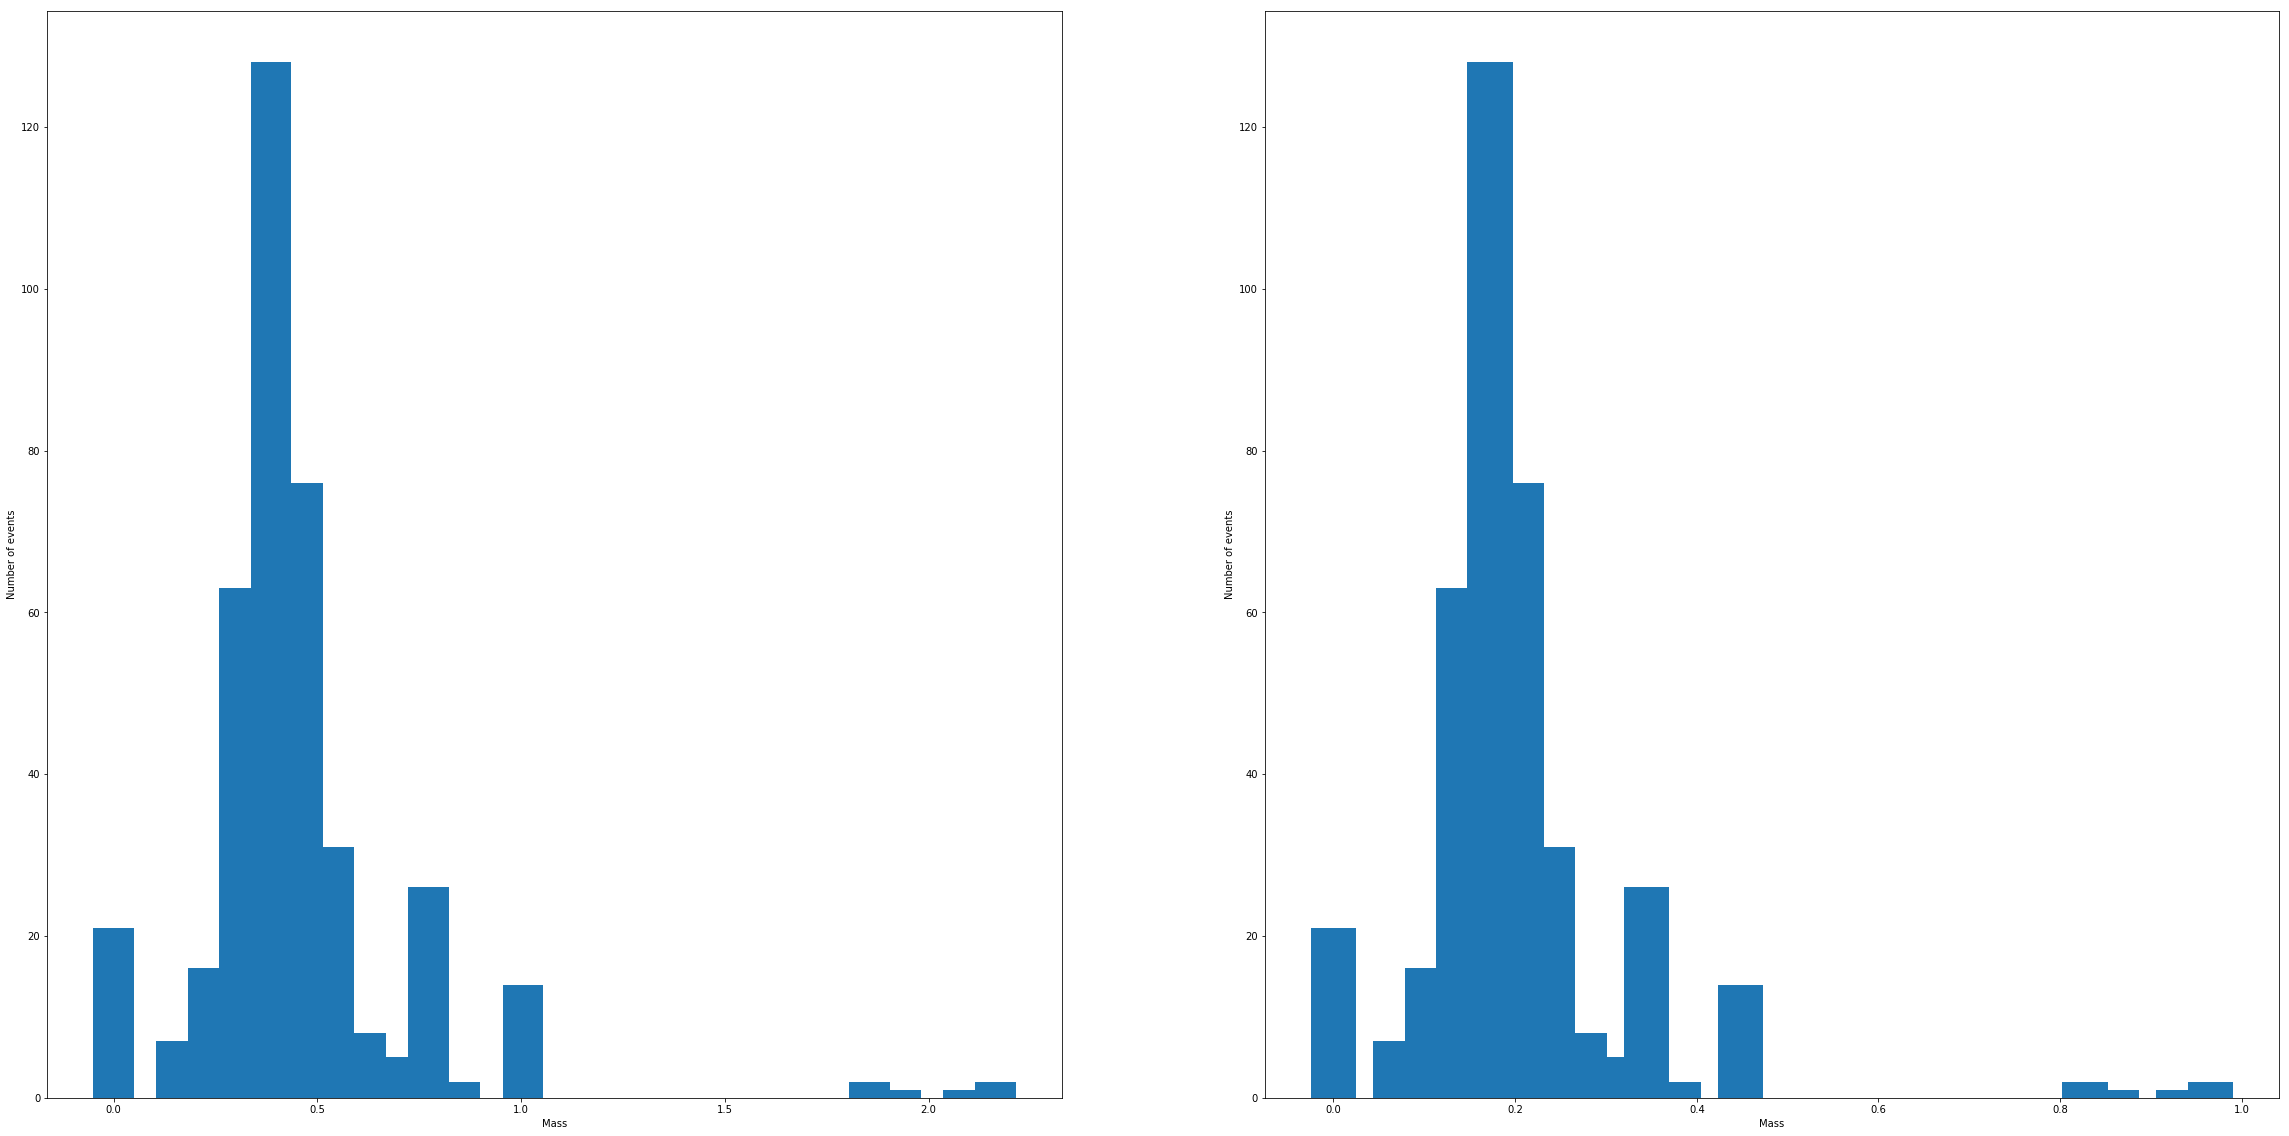

In [172]:
plt.figure(figsize=(40,20))
plt.subplot(1, 2, 1)
hist, bin_edges =np.histogram(log(mass_array), bins=np.linspace(0,max(log(mass_array)),30))
plt.bar(bin_edges[:-1], hist, width=0.1)
plt.xlabel('Mass')
plt.ylabel('Number of events')
plt.subplot(1, 2, 2)
hist, bin_edges =np.histogram(p3map(log(mass_array)), bins=np.linspace(0,1,30))
plt.bar(bin_edges[:-1], hist, width=0.05)
plt.xlabel('Mass')
plt.ylabel('Number of events')

In [86]:
min(log(mass_array))

0.0

In [139]:
pi=ParticleDT('pi+')

In [140]:
pi.mass

0.13957018

In [141]:
convert(pi.mass)

0.025318708563890714

0.025318708563890714

In [149]:
sorted(convert(mass_array))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.900049324278844e-05,
 9.900049324278844e-05,
 0.0004258667040600097,
 0.0004258667040600097,
 0.0009086728482968717,
 0.0009086728482968717,
 0.017764058874409523,
 0.017764058874409523,
 0.01946431826991804,
 0.01946431826991804,
 0.024535972598408715,
 0.025318708563890714,
 0.025318708563890714,
 0.07531749935502717,
 0.07775591754308299,
 0.07775591754308299,
 0.07826564105328983,
 0.07826564105328983,
 0.07826564105328983,
 0.08466133482026299,
 0.11122438167659232,
 0.11122438167659232,
 0.11122438167659232,
 0.11202940486979891,
 0.12353148273796725,
 0.12353148273796725,
 0.12395615838481325,
 0.1282487138267286,
 0.1282487138267286,
 0.12837797816336563,
 0.13018936780708318,
 0.1323764016485591,
 0.1323764016485591,
 0.1323764016485591,
 0.13335266885151906,
 0.13620058760110595,
 0.14522087619952845,
 0.15013331637336927,
 0.15185545074831852,
 0.15185545074831852,
 0.15214485046469955,
 0.15256923452251903,
 0.1525692345225

In [154]:
max(mass_array)

173.21

In [162]:
def mass_map(x):
    return  math.log10(1+x) / math.log10(1+173.21)

In [163]:
map_mass(0)

0.0

In [165]:
map_mass(ParticleDT('tau-').mass)

0.19792035718752274